In [2]:
import nltk
import re
import string
import warnings
import numpy as np 
import pandas as pd 
import seaborn as sns
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from nltk.stem import WordNetLemmatizer  
%matplotlib inline

# Machin Learning
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize

# Calculate accuracy of the classification model 
from sklearn.metrics import accuracy_score, f1_score
 
# Using two algorithem for comparing the dataset
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [3]:
# nlp packages
from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pooja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
import pandas as pd
traindata = pd.read_csv('dataset.csv')
traindata.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


In [5]:
# Missing values check
missing_train = traindata.isnull().sum()
print(f'Missing values:\n{missing_train}')
print('-' * 40)
# getting more information about datafram
traindata.info()
# getting more description about datafram
traindata.describe()

Missing values:
Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [6]:
traindata["labels"] = traindata["class"].map({0: "Hate Speech",
                                    1: "Offensive Language",
                                    2: "No Hate and Offensive"})
print(traindata.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                                                                                                                          tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...   
1                                                         !!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!   
2                      !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? 

In [7]:
print(traindata["tweet"].iloc[0],"\n")
print(traindata["tweet"].iloc[3],"\n")
print(traindata["tweet"].iloc[7],"\n")
print(traindata["tweet"].iloc[77],"\n")
print(traindata["tweet"].iloc[89],"\n")
print(traindata["tweet"].iloc[78],"\n")
print(traindata["tweet"].iloc[20],"\n")

!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out... 

!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny 

!!!!&#8220;@selfiequeenbri: cause I'm tired of you big bitches coming for us skinny girls!!&#8221; 

"@BeEasyJrizzy: u ever kill a ant on the sidewalk and think damn what if that nigga was on his way to get some pussy"No bs must b &gt;30%chance 

"@CB_Baby24: @white_thunduh alsarabsss" hes a beaner smh you can tell hes a mexican 

"@BeenBasedB: @_KudaBrazyy http://t.co/LuUBGL9Y5u" 0 rings 0 mvps 0 bitches lol 

" broke bitch cant tell me nothing " 



In [31]:
# label my Dataset
traindata = traindata[["tweet", "count"]]
traindata.head()

,tweet,count
0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,3
1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,3
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,3
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,3
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,6


In [32]:
# Cleaning of dataset
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub(r"\@w+|\#",'',text)
    text = re.sub(r"[^\w\s]",'',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    tweet_tokens = word_tokenize(text)
    filtered_tweets=[w for w in tweet_tokens if not w in stopword] #removing stopwords
    return " ".join(filtered_tweets)

In [33]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stopword = set(stopwords.words('english'))
traindata.tweet = traindata['tweet'].apply(clean)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pooja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pooja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
tweetdata = traindata.drop_duplicates("tweet")
tweetdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24506 entries, 0 to 24782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   24506 non-null  object
 1   count   24506 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 574.4+ KB


In [35]:
lemmatizer=WordNetLemmatizer()
def lemmatizing(traindata):
    tweet=[lemmatizer.lemmatize(word) for word in traindata]
    return traindata
import nltk
nltk.download('wordnet')
tweetdata['tweet']=tweetdata['tweet'].apply(lambda x: lemmatizing(x))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pooja\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\pooja\AppData\Local\Temp\ipykernel_15888\3449935876.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetdata['tweet']=tweetdata['tweet'].apply(lambda x: lemmatizing(x))


In [36]:
# printing the dataset after cleaning my dataset
print(tweetdata["tweet"].iloc[10],"\n")
print(tweetdata["tweet"].iloc[18],"\n")
print(tweetdata["tweet"].iloc[27],"\n")
print(tweetdata["tweet"].iloc[77],"\n")
print(tweetdata["tweet"].iloc[304],"\n")

keeks bitch curves everyone lol walked conversation like smh 

bitches get cut everyday b 

met pussy ocean dr gave pussy pill 

beeasyjrizzy u ever kill ant sidewalk think damn nigga way get pussyno bs must b 

sniff perved scally lad fuck yeah 



In [37]:
# Checking in my dataset how many columns are there in my dataset 
print(tweetdata.columns)
tweetdata['count'].value_counts()

Index(['tweet', 'count'], dtype='object')


count
3    22558
6     1546
4      210
9      166
7       26
Name: count, dtype: int64

In [38]:
# Apply N-gram on Dataset
vect=TfidfVectorizer(ngram_range=(1,2)).fit(traindata['tweet'])
Ngram_names=vect.get_feature_names_out()
print("number of 2-gram: {}\n", format(len(Ngram_names)))
print("First 1000 features: \n", format(Ngram_names[:50]))

number of 2-gram: {}
 161774
First 1000 features: 
 ['aa' 'aa classes' 'aa lol' 'aaaaaaaaand' 'aaaaaaaaand begins' 'aaahhhhh'
 'aaahhhhh internet' 'aahahah' 'aahahah fuck' 'aaliyah' 'aaliyah curving'
 'aaliyahhhm' 'aaliyahhhm knowww' 'aaliyahhlovee' 'aaliyahhlovee yu'
 'aamaadmiparty' 'aamaadmiparty mix' 'aampt' 'aampt ackin' 'aamu' 'aan'
 'aan de' 'aanderlusting' 'aanderlusting id' 'aap' 'aap maoists'
 'aap rocky' 'aap shortsaid' 'aaron' 'aaron hernandez' 'aaron hernandezs'
 'aaron weak' 'aaroncarter' 'aaroncarter push' 'aaronkeplin'
 'aaronkeplin shut' 'aaronmacgruder' 'aaronmacgruder stuff' 'aaronthegoat'
 'aaronthegoat bitch' 'aaronworthing' 'aaronworthing carolcnn'
 'aaronworthing corrcomm' 'aaryn' 'aaryn bitch' 'aaryneliza'
 'aaryneliza im' 'aaryneliza poor' 'aarynelizagries' 'aarynelizagries cry']


In [39]:
# apply 3-gram in my clean dataset 
vect=TfidfVectorizer(ngram_range=(1,3)).fit(traindata['tweet'])
Ngram_names=vect.get_feature_names_out()
print("number of 3-gram: {}\n", format(len(Ngram_names)))
print("First 1000 features: \n", format(Ngram_names[:50]))

number of 3-gram: {}
 310426
First 1000 features: 
 ['aa' 'aa classes' 'aa classes bc' 'aa lol' 'aa lol gduenez' 'aaaaaaaaand'
 'aaaaaaaaand begins' 'aaaaaaaaand begins rt' 'aaahhhhh'
 'aaahhhhh internet' 'aaahhhhh internet died' 'aahahah' 'aahahah fuck'
 'aahahah fuck watches' 'aaliyah' 'aaliyah curving' 'aaliyah curving low'
 'aaliyahhhm' 'aaliyahhhm knowww' 'aaliyahhhm knowww righttt'
 'aaliyahhlovee' 'aaliyahhlovee yu' 'aaliyahhlovee yu betta'
 'aamaadmiparty' 'aamaadmiparty mix' 'aamaadmiparty mix retards' 'aampt'
 'aampt ackin' 'aampt ackin like' 'aamu' 'aan' 'aan de' 'aan de stok'
 'aanderlusting' 'aanderlusting id' 'aanderlusting id chink' 'aap'
 'aap maoists' 'aap maoists terroristscongies' 'aap rocky' 'aap rocky via'
 'aap shortsaid' 'aap shortsaid know' 'aaron' 'aaron hernandez'
 'aaron hernandez went' 'aaron hernandezs' 'aaron hernandezs girlfriend'
 'aaron weak' 'aaron weak last']


In [40]:
# splitting of dataset
X = traindata['tweet']
Y = traindata['count']
X = vect.transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("X_train", (X_train.shape))
print("Y_train", (Y_train.shape))
print("X_test", (X_test.shape))
print("Y_test", (Y_test.shape))

X_train (19826, 310426)
Y_train (19826,)
X_test (4957, 310426)
Y_test (4957,)


In [41]:
# apply logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
logreg_predict = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_predict, Y_test)
print("logistic accuracy: {:.2f}%".format(logreg_acc*100))

logistic accuracy: 92.58%


In [42]:
# extracting Features of every tweet
import pandas as pd
traindata['word_count'] = traindata['tweet'].apply(lambda x: len(x.split()))
traindata['char_count'] = traindata['tweet'].apply(len)
traindata['avg_word_length'] = traindata['char_count'] / traindata['word_count']
traindata['hashtags_count'] = traindata['tweet'].apply(lambda x: x.count('#'))
traindata['mentions_count'] = traindata['tweet'].apply(lambda x: x.count('@'))
traindata['exclamation_count'] = traindata['tweet'].apply(lambda x: x.count('!'))
print(traindata[['word_count', 'char_count', 'avg_word_length', 'hashtags_count', 'mentions_count', 'exclamation_count']])
print(traindata)
traindata.head()

       word_count  char_count  avg_word_length  hashtags_count  \
0              12          80         6.666667               0   
1              10          49         4.900000               0   
2              11          64         5.818182               0   
3               6          40         6.666667               0   
4              11          64         5.818182               0   
...           ...         ...              ...             ...   
24778          10          67         6.700000               0   
24779           9          53         5.888889               0   
24780          11          53         4.818182               0   
24781           6          33         5.500000               0   
24782          13          88         6.769231               0   

       mentions_count  exclamation_count  
0                   0                  0  
1                   0                  0  
2                   0                  0  
3                   0              

,tweet,count,word_count,char_count,avg_word_length,hashtags_count,mentions_count,exclamation_count
0,rt mayasolovely woman shouldnt complain cleaning house amp man always take trash,3,12,80,6.666667,0,0,0
1,rt boy dats coldtyga dwn bad cuffin dat hoe place,3,10,49,4.900000,0,0,0
2,rt urkindofbrand dawg rt ever fuck bitch start cry confused shit,3,11,64,5.818182,0,0,0
3,rt cganderson vivabased look like tranny,3,6,40,6.666667,0,0,0
4,rt shenikaroberts shit hear might true might faker bitch told ya,6,11,64,5.818182,0,0,0


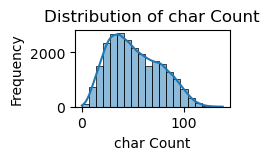

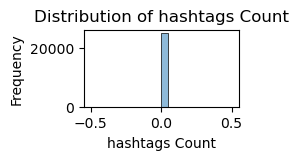

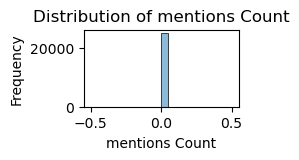

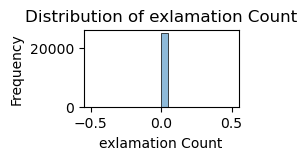

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of char count
plt.figure(figsize=(2, 1))
sns.histplot(traindata['char_count'], bins=20, kde=True)
plt.xlabel('char Count')
plt.ylabel('Frequency')
plt.title('Distribution of char Count')
plt.show()
# Distribution of hashtags count
plt.figure(figsize=(2, 1))
sns.histplot(traindata['hashtags_count'], bins=20, kde=True)
plt.xlabel('hashtags Count')
plt.ylabel('Frequency')
plt.title('Distribution of hashtags Count')
plt.show()
# Distribution of mentions count
plt.figure(figsize=(2, 1))
sns.histplot(traindata['mentions_count'], bins=20, kde=True)
plt.xlabel('mentions Count')
plt.ylabel('Frequency')
plt.title('Distribution of mentions Count')
plt.show()
# Distribution of exclamation count
plt.figure(figsize=(2, 1))
sns.histplot(traindata['exclamation_count'], bins=20, kde=True)
plt.xlabel('exlamation Count')
plt.ylabel('Frequency')
plt.title('Distribution of exlamation Count')
plt.show()

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')


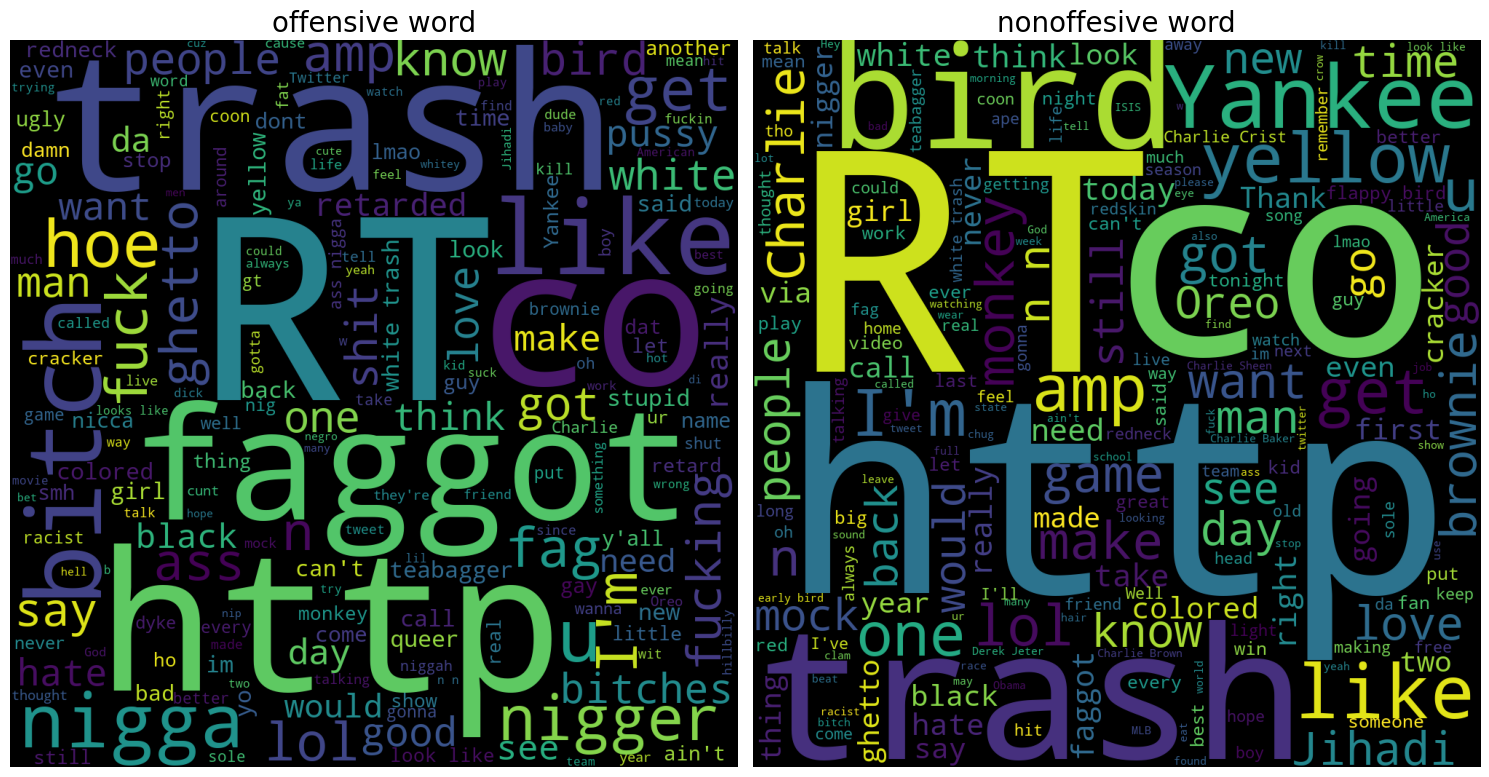

In [46]:
# Plotting wordclouds for offensive language in Training Dataset
import pandas as pd
import re
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')
stopwords = set(stopwords_list)
train_df = pd.read_csv('dataset.csv')
print(train_df.columns)
offense_lang_tweets = train_df['tweet'][train_df['offensive_language']==1].to_string()
wordcloud_offense_lang = WordCloud(width = 1000, height = 1000,
                               background_color ='black', stopwords = stopwords,
                               min_font_size = 15).generate(offense_lang_tweets)
nonoffense_lang_tweets = train_df['tweet'][train_df['offensive_language']==0].to_string()
wordcloud_nonoffense_lang = WordCloud(width = 1000, height = 1000,
                               background_color ='black', stopwords = stopwords,
                               min_font_size = 15).generate(nonoffense_lang_tweets)
# Plotting the WordCloud images
plt.figure(figsize=(15, 8), facecolor = None)

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_offense_lang)
plt.axis("off")
plt.title('offensive word', fontdict={'fontsize': 20})

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_nonoffense_lang)
plt.axis("off")
plt.title('nonoffesive word', fontdict={'fontsize': 20})

plt.tight_layout()
plt.show()

In [28]:
# Plotting wordclouds for offensive language in Training Dataset
import pandas as pd
import re
from nltk.corpus import words
from wordcloud import WordCloud
word_corpus = words.words()
traindata = pd.read_csv('dataset.csv')
print(traindata.columns)
offense_lang_tweets = traindata['tweet'][traindata['offensiv_language']==1].to_string()
wordcloud_offense_lang = WordCloud(width = 1000, height = 1000, 
                               background_color ='black', stopwords = stopwords,
                               min_font_size = 15).generate(offense_lang_tweets)
nonoffense_lang_tweets = traindata['tweet'][traindata['offensive_language']==0].to_string()
wordcloud_nonoffense_lang = WordCloud(width = 1000, height = 1000, 
                               background_color ='black', stopwords = stopwords,
                               min_font_size = 15).generate(nonoffense_lang_tweets)
# Plotting the WordCloud images                     
plt.figure(figsize=(15, 8), facecolor = None)

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_offense_lang)
plt.axis("off")
plt.title('offensive word', fontdict={'fontsize': 20})

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_nonoffense_lang)
plt.axis("off")
plt.title('nonoffesive word', fontdict={'fontsize': 20})

plt.tight_layout() 
plt.show()

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')


TypeError: 'WordListCorpusReader' object is not iterable